# FastF1 Library Exploration

This notebook explores the FastF1 Python library for accessing and analyzing Formula 1 timing data and telemetry.

We'll cover:
- Session data loading
- Lap times and statistics
- Telemetry data (speed, throttle, brake, gear, etc.)
- Driver and team information
- Weather data
- Track status and events
- Data visualizations

## 1. Install and Import FastF1

First, we need to install FastF1 and import the necessary libraries.

In [1]:
# Install FastF1 (uncomment if not already installed)
# !pip install fastf1

# Import libraries
import fastf1
from fastf1 import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# Configure settings
warnings.filterwarnings('ignore')

# Create cache directory if it doesn't exist
cache_dir = '/tmp/fastf1_cache'
os.makedirs(cache_dir, exist_ok=True)
fastf1.Cache.enable_cache(cache_dir)  # Enable caching to speed up data loading

plotting.setup_mpl()  # Setup matplotlib for F1 plotting

print(f"FastF1 version: {fastf1.__version__}")
print("Setup complete!")

FastF1 version: 3.7.0
Setup complete!


## 2. Load a Race Session

Let's load a race session. We'll use the 2024 Monaco Grand Prix as an example.

In [2]:
# Load the 2024 Monaco Grand Prix - Race session
# Parameters: year, race location, session type
session = fastf1.get_session(2024, 'Monaco', 'R')

# Load the session data (this may take a few moments on first run)
print("Loading session data...")
session.load()
print("Session loaded successfully!")

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Loading session data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Session loaded successfully!


## 3. Explore Session Information

Let's look at the basic metadata about this session.

In [3]:
print(f"Event Name: {session.event['EventName']}")
print(f"Location: {session.event['Location']}")
print(f"Country: {session.event['Country']}")
print(f"Event Date: {session.event['EventDate']}")
print(f"Session: {session.name}")
print(f"Session Date: {session.date}")
print(f"\nAvailable session types: Practice 1, Practice 2, Practice 3, Qualifying, Sprint, Race")
print(f"\nSession info object attributes:")
print(session.session_info)

Event Name: Monaco Grand Prix
Location: Monaco
Country: Monaco
Event Date: 2024-05-26 00:00:00
Session: Race
Session Date: 2024-05-26 13:00:00

Available session types: Practice 1, Practice 2, Practice 3, Qualifying, Sprint, Race

Session info object attributes:
{'Meeting': {'Key': 1236, 'Name': 'Monaco Grand Prix', 'OfficialName': 'FORMULA 1 GRAND PRIX DE MONACO 2024', 'Location': 'Monaco', 'Country': {'Key': 114, 'Code': 'MON', 'Name': 'Monaco'}, 'Circuit': {'Key': 22, 'ShortName': 'Monte Carlo'}}, 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9523, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2024, 5, 26, 15, 0), 'EndDate': datetime.datetime(2024, 5, 26, 17, 0), 'GmtOffset': datetime.timedelta(seconds=7200), 'Path': '2024/2024-05-26_Monaco_Grand_Prix/2024-05-26_Race/'}


## 4. Get Driver List and Basic Info

FastF1 provides detailed driver and team information.

In [4]:
# Get all drivers
drivers = session.drivers
print(f"Number of drivers: {len(drivers)}\n")

# Get driver information
for drv in drivers:
    driver_info = session.get_driver(drv)
    print(f"{driver_info['Abbreviation']:3s} - {driver_info['FullName']:25s} - {driver_info['TeamName']}")

# Let's look at detailed info for one driver
print("\n" + "="*60)
print("Detailed info for first driver:")
print("="*60)
first_driver = session.get_driver(drivers[0])
for key, value in first_driver.items():
    print(f"{key:20s}: {value}")

Number of drivers: 20

LEC - Charles Leclerc           - Ferrari
PIA - Oscar Piastri             - McLaren
SAI - Carlos Sainz              - Ferrari
NOR - Lando Norris              - McLaren
RUS - George Russell            - Mercedes
VER - Max Verstappen            - Red Bull Racing
HAM - Lewis Hamilton            - Mercedes
TSU - Yuki Tsunoda              - RB
ALB - Alexander Albon           - Williams
GAS - Pierre Gasly              - Alpine
ALO - Fernando Alonso           - Aston Martin
RIC - Daniel Ricciardo          - RB
BOT - Valtteri Bottas           - Kick Sauber
STR - Lance Stroll              - Aston Martin
SAR - Logan Sargeant            - Williams
ZHO - Guanyu Zhou               - Kick Sauber
OCO - Esteban Ocon              - Alpine
PER - Sergio Perez              - Red Bull Racing
HUL - Nico Hulkenberg           - Haas F1 Team
MAG - Kevin Magnussen           - Haas F1 Team

Detailed info for first driver:
DriverNumber        : 16
BroadcastName       : C LECLERC
Abbreviatio

## 5. Load Lap Data

Lap data contains information about each lap completed by every driver.

In [5]:
# Get all laps
laps = session.laps
print(f"Total laps in session: {len(laps)}")
print(f"\nLap data columns:")
print(laps.columns.tolist())

# Display first few laps
print(f"\nFirst 10 laps:")
display(laps.head(10))

# Get laps for a specific driver (e.g., VER - Max Verstappen)
ver_laps = session.laps.pick_driver('VER')
print(f"\nMax Verstappen completed {len(ver_laps)} laps")
display(ver_laps.head())

Total laps in session: 1237

Lap data columns:
['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate']

First 10 laps:


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:36:02.319000,LEC,16,0 days 00:40:56.330000,1.0,1.0,NaT,0 days 00:56:45.433000,NaT,0 days 00:00:46.389000,...,True,Ferrari,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,1.0,False,,False,False
1,0 days 01:39:00.140000,LEC,16,NaT,2.0,2.0,0 days 01:36:03.182000,NaT,0 days 00:00:26.854000,0 days 00:00:41.743000,...,True,Ferrari,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,1.0,False,,False,False
2,0 days 01:40:24.764000,LEC,16,0 days 00:01:24.624000,3.0,2.0,NaT,NaT,0 days 00:00:24.007000,0 days 00:00:38.235000,...,True,Ferrari,0 days 01:39:00.140000,2024-05-26 13:47:05.529,1,1.0,False,,False,True
3,0 days 01:41:47.389000,LEC,16,0 days 00:01:22.625000,4.0,2.0,NaT,NaT,0 days 00:00:21.892000,0 days 00:00:38.779000,...,True,Ferrari,0 days 01:40:24.764000,2024-05-26 13:48:30.153,1,1.0,False,,False,True
4,0 days 01:43:09.184000,LEC,16,0 days 00:01:21.795000,5.0,2.0,NaT,NaT,0 days 00:00:21.314000,0 days 00:00:38.513000,...,True,Ferrari,0 days 01:41:47.389000,2024-05-26 13:49:52.778,1,1.0,False,,False,True
5,0 days 01:44:30.329000,LEC,16,0 days 00:01:21.145000,6.0,2.0,NaT,NaT,0 days 00:00:21.568000,0 days 00:00:38.168000,...,True,Ferrari,0 days 01:43:09.184000,2024-05-26 13:51:14.573,1,1.0,False,,False,True
6,0 days 01:45:51.309000,LEC,16,0 days 00:01:20.980000,7.0,2.0,NaT,NaT,0 days 00:00:21.370000,0 days 00:00:38.056000,...,True,Ferrari,0 days 01:44:30.329000,2024-05-26 13:52:35.718,1,1.0,False,,False,True
7,0 days 01:47:12.339000,LEC,16,0 days 00:01:21.030000,8.0,2.0,NaT,NaT,0 days 00:00:21.250000,0 days 00:00:38.171000,...,True,Ferrari,0 days 01:45:51.309000,2024-05-26 13:53:56.698,1,1.0,False,,False,True
8,0 days 01:48:32.453000,LEC,16,0 days 00:01:20.114000,9.0,2.0,NaT,NaT,0 days 00:00:21.092000,0 days 00:00:37.612000,...,True,Ferrari,0 days 01:47:12.339000,2024-05-26 13:55:17.728,1,1.0,False,,False,True
9,0 days 01:49:53.228000,LEC,16,0 days 00:01:20.775000,10.0,2.0,NaT,NaT,0 days 00:00:21.036000,0 days 00:00:37.886000,...,True,Ferrari,0 days 01:48:32.453000,2024-05-26 13:56:37.842,1,1.0,False,,False,True



Max Verstappen completed 78 laps


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
390,0 days 01:36:25.073000,VER,1,0 days 00:41:18.944000,1.0,1.0,NaT,0 days 00:56:53.182000,NaT,0 days 00:00:50.381000,...,True,Red Bull Racing,0 days 00:55:05.680000,2024-05-26 13:03:11.069,1254,6.0,False,,False,False
391,0 days 01:39:02.340000,VER,1,NaT,2.0,2.0,0 days 01:36:25.661000,NaT,0 days 00:00:24.134000,0 days 00:00:38.218000,...,True,Red Bull Racing,0 days 01:35:54.733000,2024-05-26 13:44:00.122,14,6.0,False,,False,False
392,0 days 01:40:28.084000,VER,1,0 days 00:01:25.744000,3.0,2.0,NaT,NaT,0 days 00:00:24.715000,0 days 00:00:38.860000,...,True,Red Bull Racing,0 days 01:39:02.340000,2024-05-26 13:47:07.729,1,6.0,False,,False,True
393,0 days 01:41:51.359000,VER,1,0 days 00:01:23.275000,4.0,2.0,NaT,NaT,0 days 00:00:21.947000,0 days 00:00:38.888000,...,True,Red Bull Racing,0 days 01:40:28.084000,2024-05-26 13:48:33.473,1,6.0,False,,False,True
394,0 days 01:43:14.759000,VER,1,0 days 00:01:23.400000,5.0,2.0,NaT,NaT,0 days 00:00:22.318000,0 days 00:00:38.953000,...,True,Red Bull Racing,0 days 01:41:51.359000,2024-05-26 13:49:56.748,1,6.0,False,,False,True


## 6. Explore Lap Times and Statistics

Let's analyze lap times and find the fastest lap.

In [6]:
# Get fastest lap of the session
fastest_lap = laps.pick_fastest()
print("Fastest lap of the session:")
print(f"Driver: {fastest_lap['Driver']}")
print(f"Team: {fastest_lap['Team']}")
print(f"Lap Time: {fastest_lap['LapTime']}")
print(f"Lap Number: {fastest_lap['LapNumber']}")
print(f"Compound: {fastest_lap['Compound']}")
print(f"Sector 1: {fastest_lap['Sector1Time']}")
print(f"Sector 2: {fastest_lap['Sector2Time']}")
print(f"Sector 3: {fastest_lap['Sector3Time']}")
print(f"Speed I1: {fastest_lap['SpeedI1']} km/h")
print(f"Speed I2: {fastest_lap['SpeedI2']} km/h")
print(f"Speed FL: {fastest_lap['SpeedFL']} km/h")
print(f"Speed ST: {fastest_lap['SpeedST']} km/h")

# Get driver's fastest lap
ver_fastest = ver_laps.pick_fastest()
print(f"\n{ver_fastest['Driver']}'s fastest lap: {ver_fastest['LapTime']}")

Fastest lap of the session:
Driver: HAM
Team: Mercedes
Lap Time: 0 days 00:01:14.165000
Lap Number: 63.0
Compound: HARD
Sector 1: 0 days 00:00:19.548000
Sector 2: 0 days 00:00:34.854000
Sector 3: 0 days 00:00:19.763000
Speed I1: 210.0 km/h
Speed I2: 199.0 km/h
Speed FL: 261.0 km/h
Speed ST: 282.0 km/h

VER's fastest lap: 0 days 00:01:14.569000


## 7. Access Car Telemetry Data

This is where it gets interesting! Telemetry includes speed, throttle, brake, gear, RPM, DRS, and more.

In [7]:
# Get telemetry for the fastest lap
telemetry = fastest_lap.get_telemetry()

print(f"Telemetry data points: {len(telemetry)}")
print(f"\nAvailable telemetry channels:")
print(telemetry.columns.tolist())

print("\nFirst 10 telemetry samples:")
display(telemetry.head(10))

# Show some statistics
print("\nTelemetry Statistics:")
print(f"Max Speed: {telemetry['Speed'].max():.2f} km/h")
print(f"Min Speed: {telemetry['Speed'].min():.2f} km/h")
print(f"Avg Speed: {telemetry['Speed'].mean():.2f} km/h")
print(f"Max RPM: {telemetry['RPM'].max():.0f}")
print(f"Number of gear changes: {telemetry['nGear'].diff().abs().sum():.0f}")
print(f"DRS activations: {(telemetry['DRS'] > 10).sum()} samples")

Telemetry data points: 585

Available telemetry channels:
['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source', 'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z']

First 10 telemetry samples:


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-26 15:06:33.514,0 days 02:58:28.125000,,256.645000,0 days 00:00:00,11003.574954,266.549999,7,100.000000,False,0,interpolation,0.541292,0.000165,OnTrack,-7659.535043,-6651.784871,502.060720
3,2024-05-26 15:06:33.541,0 days 02:58:28.152000,,256.645000,0 days 00:00:00.027000,11023.000000,267.000000,7,100.000000,False,0,car,2.557500,0.000778,OnTrack,-7660.752358,-6631.957275,502.046826
4,2024-05-26 15:06:33.591,0 days 02:58:28.202000,,256.645000,0 days 00:00:00.077000,11047.250062,267.500001,7,100.000000,False,0,pos,6.297120,0.001916,OnTrack,-7663.000000,-6595.000000,502.000000
5,2024-05-26 15:06:33.771,0 days 02:58:28.382000,,256.645000,0 days 00:00:00.257000,11134.550062,269.300001,7,100.000000,False,0,pos,19.822445,0.006033,OnTrack,-7671.000000,-6460.000000,502.000000
6,2024-05-26 15:06:33.891,0 days 02:58:28.502000,,256.645000,0 days 00:00:00.377000,11192.750062,270.500001,7,100.000000,False,0,pos,28.884085,0.008791,OnTrack,-7676.000000,-6370.000000,503.000000
7,2024-05-26 15:06:33.941,0 days 02:58:28.552000,1,256.645000,0 days 00:00:00.427000,11217.000000,271.000000,7,100.000000,False,0,car,32.668611,0.009942,OnTrack,-7677.666364,-6332.414373,503.208940
8,2024-05-26 15:06:34.111,0 days 02:58:28.722000,1,252.914442,0 days 00:00:00.597000,11283.178621,272.821430,7,100.000000,False,0,pos,45.575981,0.013871,OnTrack,-7680.000000,-6204.000000,503.000000
9,2024-05-26 15:06:34.221,0 days 02:58:28.832000,1,250.500556,0 days 00:00:00.707000,11326.000000,274.000000,7,100.000000,False,0,car,53.979722,0.016428,OnTrack,-7677.025982,-6120.321124,502.930133
10,2024-05-26 15:06:34.391,0 days 02:58:29.002000,1,247.053333,0 days 00:00:00.877000,11279.925227,275.059190,7,93.644859,False,0,pos,67.068342,0.020412,OnTrack,-7668.000000,-5990.000000,503.000000
11,2024-05-26 15:06:34.542,0 days 02:58:29.153000,1,243.991389,0 days 00:00:01.028000,11239.000000,276.000000,7,88.000000,False,0,car,78.589722,0.023918,OnTrack,-7659.465577,-5873.336670,503.110544



Telemetry Statistics:
Max Speed: 288.00 km/h
Min Speed: 46.00 km/h
Avg Speed: 159.35 km/h
Max RPM: 11711
Number of gear changes: 46
DRS activations: 0 samples


### Telemetry Channels Explained:
- **Speed**: Car speed in km/h
- **RPM**: Engine revolutions per minute
- **nGear**: Current gear (1-8)
- **Throttle**: Throttle position (0-100%)
- **Brake**: Brake pressure (0-100% or boolean)
- **DRS**: DRS (Drag Reduction System) status
- **Distance**: Distance along track in meters
- **X, Y, Z**: Position coordinates
- **Status**: Status flags
- **Time**: Elapsed time
- **SessionTime**: Time from session start
- **Date**: Timestamp

## 8. Visualize Speed Telemetry

Let's create visualizations of the telemetry data.

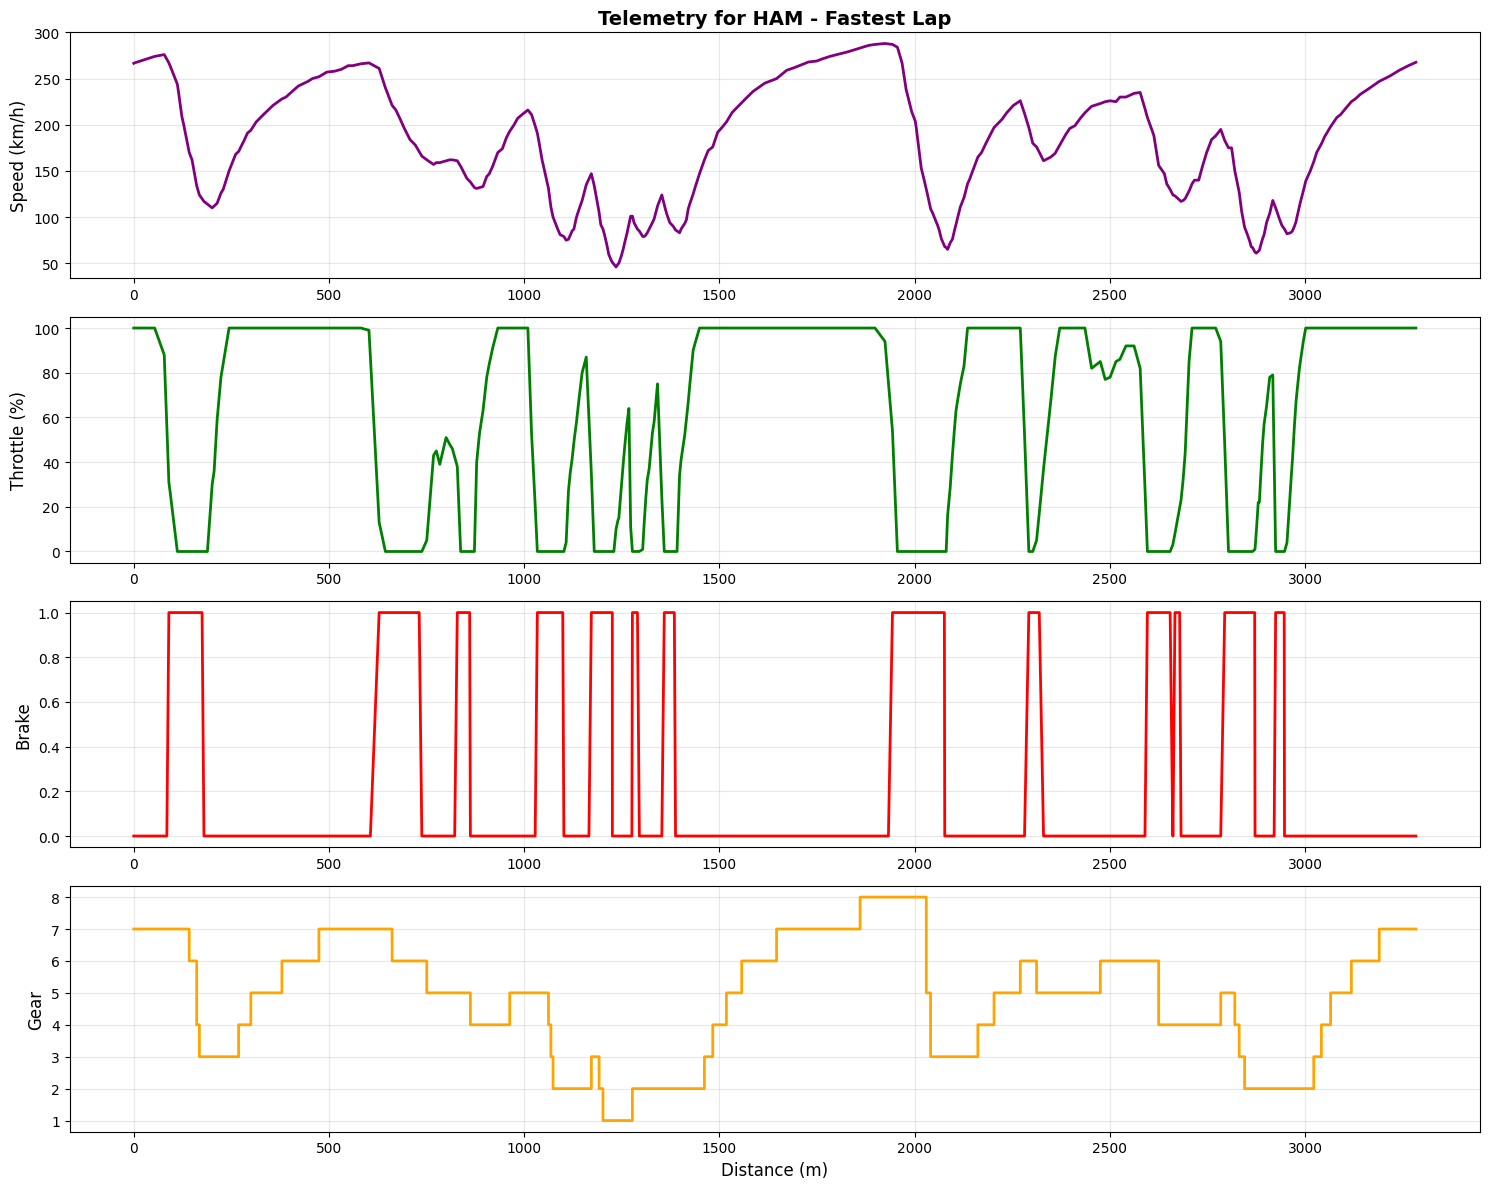

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(15, 12))

# Plot Speed
ax[0].plot(telemetry['Distance'], telemetry['Speed'], color='purple', linewidth=2)
ax[0].set_ylabel('Speed (km/h)', fontsize=12)
ax[0].set_title(f'Telemetry for {fastest_lap["Driver"]} - Fastest Lap', fontsize=14, fontweight='bold')
ax[0].grid(True, alpha=0.3)

# Plot Throttle
ax[1].plot(telemetry['Distance'], telemetry['Throttle'], color='green', linewidth=2)
ax[1].set_ylabel('Throttle (%)', fontsize=12)
ax[1].grid(True, alpha=0.3)

# Plot Brake
ax[2].plot(telemetry['Distance'], telemetry['Brake'], color='red', linewidth=2)
ax[2].set_ylabel('Brake', fontsize=12)
ax[2].grid(True, alpha=0.3)

# Plot Gear
ax[3].plot(telemetry['Distance'], telemetry['nGear'], color='orange', linewidth=2, drawstyle='steps-post')
ax[3].set_ylabel('Gear', fontsize=12)
ax[3].set_xlabel('Distance (m)', fontsize=12)
ax[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Compare Telemetry Between Drivers

Let's compare two drivers on their fastest laps.

req            INFO 	Using cached data for driver_info


VER fastest lap: 0 days 00:01:14.569000
HAM fastest lap: 0 days 00:01:14.165000
Difference: 0 days 00:00:00.404000


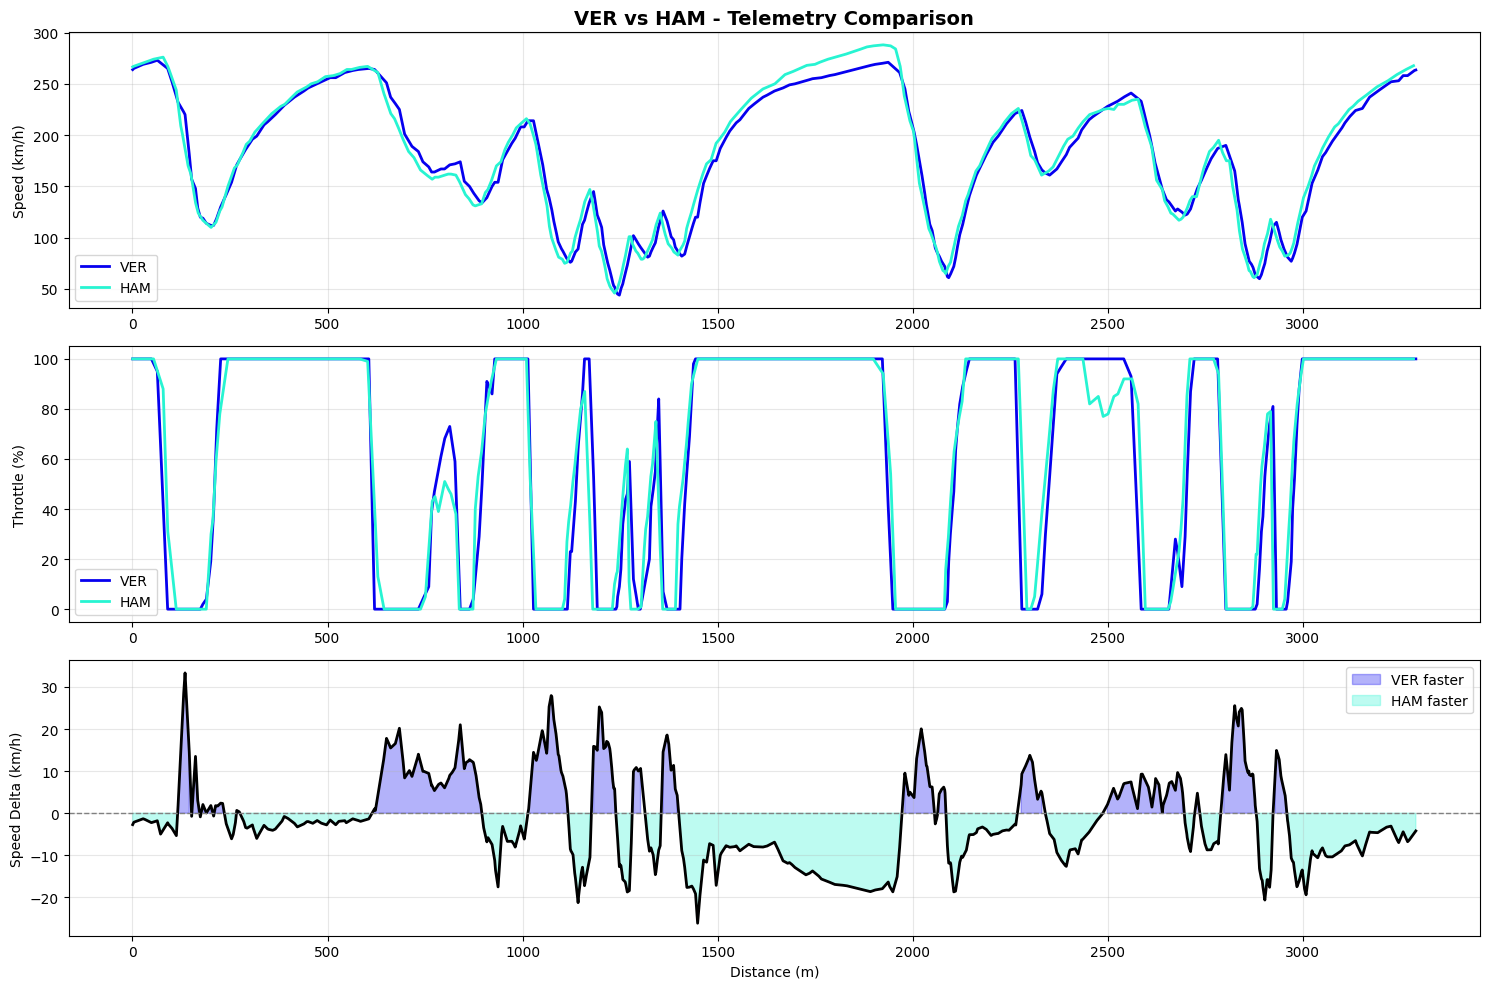

In [9]:
# Get fastest laps for two drivers (e.g., VER and HAM)
driver1 = 'VER'
driver2 = 'HAM'

lap1 = session.laps.pick_driver(driver1).pick_fastest()
lap2 = session.laps.pick_driver(driver2).pick_fastest()

tel1 = lap1.get_telemetry()
tel2 = lap2.get_telemetry()

# Get team colors for plotting
try:
    # Newer FastF1 versions
    team1_color = plotting.get_team_color(lap1['Team'], session=session)
    team2_color = plotting.get_team_color(lap2['Team'], session=session)
except (AttributeError, TypeError):
    # Fallback to manual colors
    team1_color = '#3671C6'  # Red Bull blue
    team2_color = '#27F4D2'  # Mercedes green

print(f"{driver1} fastest lap: {lap1['LapTime']}")
print(f"{driver2} fastest lap: {lap2['LapTime']}")
print(f"Difference: {lap1['LapTime'] - lap2['LapTime']}")

# Plot comparison
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

# Speed comparison
ax[0].plot(tel1['Distance'], tel1['Speed'], color=team1_color, label=driver1, linewidth=2)
ax[0].plot(tel2['Distance'], tel2['Speed'], color=team2_color, label=driver2, linewidth=2)
ax[0].set_ylabel('Speed (km/h)')
ax[0].set_title(f'{driver1} vs {driver2} - Telemetry Comparison', fontsize=14, fontweight='bold')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Throttle comparison
ax[1].plot(tel1['Distance'], tel1['Throttle'], color=team1_color, label=driver1, linewidth=2)
ax[1].plot(tel2['Distance'], tel2['Throttle'], color=team2_color, label=driver2, linewidth=2)
ax[1].set_ylabel('Throttle (%)')
ax[1].legend()
ax[1].grid(True, alpha=0.3)

# Speed delta (difference)
# We need to interpolate to compare at same distances
tel2_speed_interp = np.interp(tel1['Distance'], tel2['Distance'], tel2['Speed'])
speed_delta = tel1['Speed'] - tel2_speed_interp

ax[2].plot(tel1['Distance'], speed_delta, color='black', linewidth=2)
ax[2].axhline(0, color='gray', linestyle='--', linewidth=1)
ax[2].fill_between(tel1['Distance'], 0, speed_delta, 
                     where=speed_delta >= 0, color=team1_color, alpha=0.3, label=f'{driver1} faster')
ax[2].fill_between(tel1['Distance'], 0, speed_delta, 
                     where=speed_delta < 0, color=team2_color, alpha=0.3, label=f'{driver2} faster')
ax[2].set_ylabel('Speed Delta (km/h)')
ax[2].set_xlabel('Distance (m)')
ax[2].legend()
ax[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Explore Position Data (Car Positioning)

Position data shows where the car is on the track in X, Y, Z coordinates.

In [10]:
# Let's look at position data
print("Position data columns in telemetry:")
print([col for col in telemetry.columns if col in ['X', 'Y', 'Z', 'Distance']])

# Display some position samples
print("\nSample position data:")
display(telemetry[['Distance', 'X', 'Y', 'Z']].head(20))

Position data columns in telemetry:
['Distance', 'X', 'Y', 'Z']

Sample position data:


,Distance,X,Y,Z
2,0.541292,-7659.535043,-6651.784871,502.060720
3,2.557500,-7660.752358,-6631.957275,502.046826
4,6.297120,-7663.000000,-6595.000000,502.000000
5,19.822445,-7671.000000,-6460.000000,502.000000
6,28.884085,-7676.000000,-6370.000000,503.000000
7,32.668611,-7677.666364,-6332.414373,503.208940
8,45.575981,-7680.000000,-6204.000000,503.000000
9,53.979722,-7677.025982,-6120.321124,502.930133
10,67.068342,-7668.000000,-5990.000000,503.000000
11,78.589722,-7659.465577,-5873.336670,503.110544


## 11. Visualize Track Position - Monaco 2025 Verstappen Lap

Let's plot the Y vs Z coordinates to visualize the track layout from a lap.

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Loading Monaco 2025 Race session...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Session loaded!

Verstappen's fastest lap time: 0 days 00:01:14.230000
Telemetry points: 558


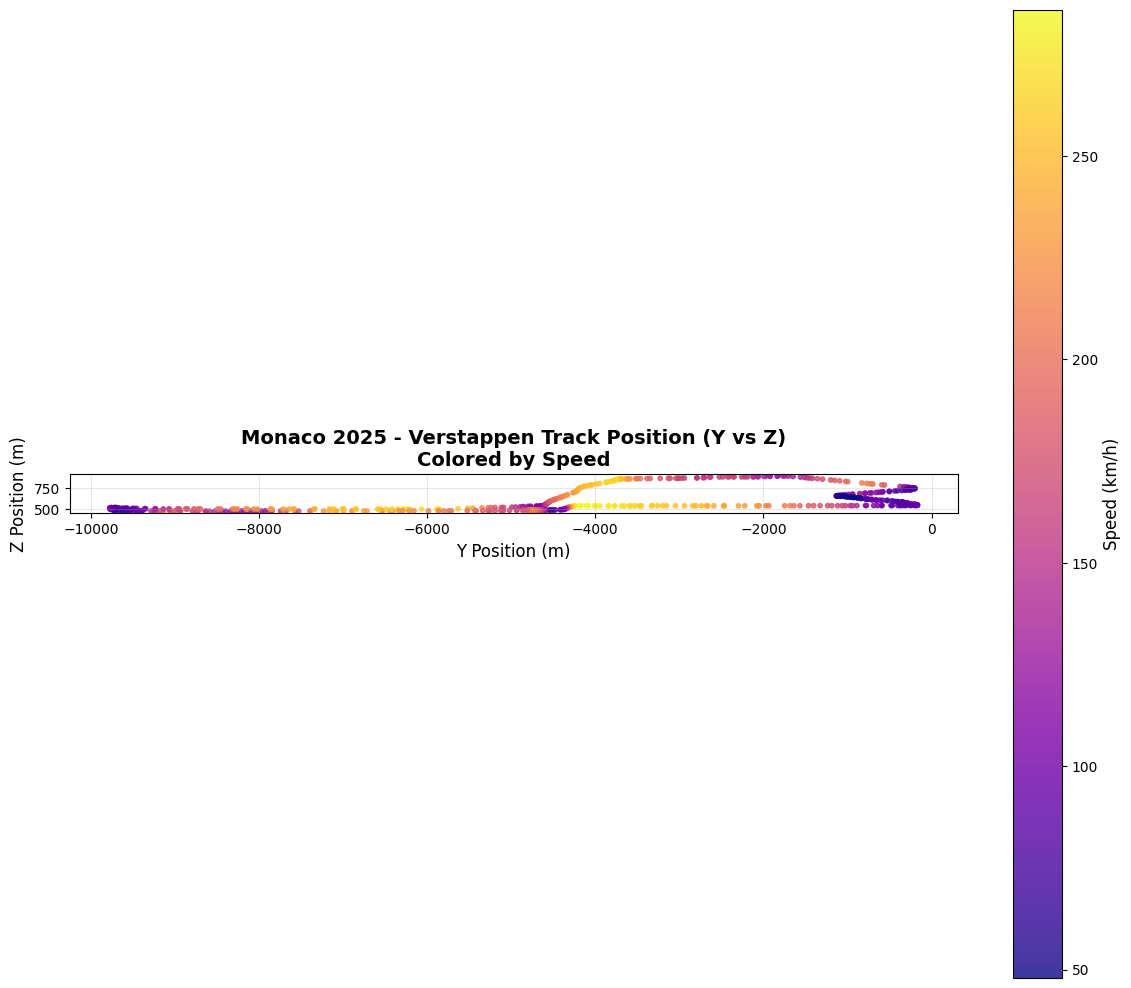

In [11]:
# Load Monaco 2025 session
session_2025 = fastf1.get_session(2025, 'Monaco', 'R')
print("Loading Monaco 2025 Race session...")
session_2025.load()
print("Session loaded!")

# Get Verstappen's fastest lap
ver_lap_2025 = session_2025.laps.pick_driver('VER').pick_fastest()
ver_tel_2025 = ver_lap_2025.get_telemetry()

print(f"\nVerstappen's fastest lap time: {ver_lap_2025['LapTime']}")
print(f"Telemetry points: {len(ver_tel_2025)}")

# Create Y vs Z scatter plot (top-down view of track)
fig, ax = plt.subplots(figsize=(12, 10))

# Color by speed for better visualization
scatter = ax.scatter(ver_tel_2025['Y'], ver_tel_2025['Z'], 
                     c=ver_tel_2025['Speed'], 
                     cmap='plasma', 
                     s=10, 
                     alpha=0.8)

ax.set_xlabel('Y Position (m)', fontsize=12)
ax.set_ylabel('Z Position (m)', fontsize=12)
ax.set_title('Monaco 2025 - Verstappen Track Position (Y vs Z)\nColored by Speed', 
             fontsize=14, fontweight='bold')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Speed (km/h)', fontsize=12)

plt.tight_layout()
plt.show()

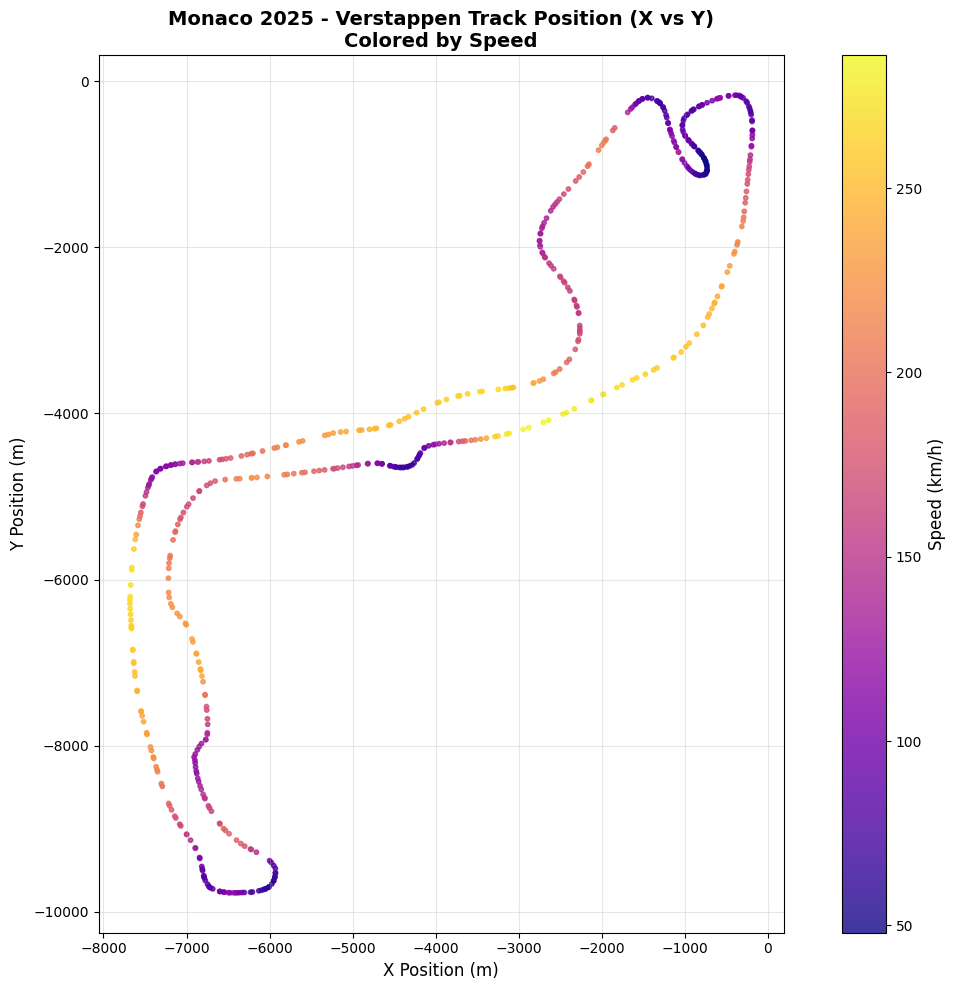

In [12]:
# Create X vs Y scatter plot (different track view)
fig, ax = plt.subplots(figsize=(12, 10))

# Color by speed for better visualization
scatter = ax.scatter(ver_tel_2025['X'], ver_tel_2025['Y'], 
                     c=ver_tel_2025['Speed'], 
                     cmap='plasma', 
                     s=10, 
                     alpha=0.8)

ax.set_xlabel('X Position (m)', fontsize=12)
ax.set_ylabel('Y Position (m)', fontsize=12)
ax.set_title('Monaco 2025 - Verstappen Track Position (X vs Y)\nColored by Speed', 
             fontsize=14, fontweight='bold')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Speed (km/h)', fontsize=12)

plt.tight_layout()
plt.show()

## 12. Weather Data

FastF1 also provides weather information for each session.

In [13]:
# Get weather data
weather = session.weather_data

print("Weather data columns:")
print(weather.columns.tolist())
print(f"\nWeather data points: {len(weather)}")

# Display sample weather data
print("\nSample weather data:")
display(weather.head(10))

# Show weather statistics
print("\nWeather Statistics:")
print(f"Track Temperature - Min: {weather['TrackTemp'].min():.1f}°C, Max: {weather['TrackTemp'].max():.1f}°C, Avg: {weather['TrackTemp'].mean():.1f}°C")
print(f"Air Temperature - Min: {weather['AirTemp'].min():.1f}°C, Max: {weather['AirTemp'].max():.1f}°C, Avg: {weather['AirTemp'].mean():.1f}°C")
print(f"Humidity - Min: {weather['Humidity'].min():.1f}%, Max: {weather['Humidity'].max():.1f}%, Avg: {weather['Humidity'].mean():.1f}%")
print(f"Rainfall: {weather['Rainfall'].any()}")

Weather data columns:
['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']

Weather data points: 200

Sample weather data:


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:54.094000,21.1,69.0,1019.1,False,49.4,27,1.1
1,0 days 00:01:54.088000,21.1,68.0,1019.1,False,49.5,2,0.8
2,0 days 00:02:54.095000,21.0,68.0,1019.2,False,50.0,3,0.9
3,0 days 00:03:54.083000,21.0,68.0,1019.1,False,48.3,8,0.7
4,0 days 00:04:54.095000,20.9,66.0,1019.1,False,48.4,107,1.2
5,0 days 00:05:54.092000,21.0,66.0,1019.1,False,48.4,1,0.4
6,0 days 00:06:54.098000,21.1,67.0,1019.1,False,48.0,329,1.3
7,0 days 00:07:54.090000,21.0,67.0,1019.1,False,47.8,38,1.4
8,0 days 00:08:54.117000,21.0,66.0,1019.0,False,48.0,9,1.0
9,0 days 00:09:54.110000,21.2,66.0,1019.1,False,48.0,22,1.1



Weather Statistics:
Track Temperature - Min: 40.2°C, Max: 50.0°C, Avg: 46.3°C
Air Temperature - Min: 20.9°C, Max: 22.3°C, Avg: 21.6°C
Humidity - Min: 57.0%, Max: 69.0%, Avg: 64.0%
Rainfall: False


## 13. Track Status and Session Events

Track status shows flags and session events throughout the race.

In [14]:
# Get race control messages (track status, flags, etc.)
race_control = session.race_control_messages

print("Race control message columns:")
print(race_control.columns.tolist())
print(f"\nTotal race control messages: {len(race_control)}")

# Display first few messages
print("\nFirst 15 race control messages:")
display(race_control.head(15))

# Count message categories
if 'Category' in race_control.columns:
    print("\nMessage categories:")
    print(race_control['Category'].value_counts())

# Show any safety car or flag events
print("\nSafety-related messages:")
safety_keywords = ['SAFETY', 'VSC', 'YELLOW', 'RED', 'FLAG']
safety_messages = race_control[race_control['Message'].str.contains('|'.join(safety_keywords), case=False, na=False)]
if len(safety_messages) > 0:
    display(safety_messages)
else:
    print("No safety car or flag events found")

Race control message columns:
['Time', 'Category', 'Message', 'Status', 'Flag', 'Scope', 'Sector', 'RacingNumber', 'Lap']

Total race control messages: 118

First 15 race control messages:


,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
0,2024-05-26 12:20:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,1
1,2024-05-26 12:30:00,Other,PIT EXIT CLOSED,None,None,None,NaN,None,1
2,2024-05-26 12:31:05,Flag,DOUBLE YELLOW IN TRACK SECTOR 7,None,DOUBLE YELLOW,Sector,7.0,None,1
3,2024-05-26 12:31:34,Flag,CLEAR IN TRACK SECTOR 7,None,CLEAR,Sector,7.0,None,1
4,2024-05-26 12:42:06,Flag,DOUBLE YELLOW IN TRACK SECTOR 12,None,DOUBLE YELLOW,Sector,12.0,None,1
5,2024-05-26 12:43:01,Flag,CLEAR IN TRACK SECTOR 12,None,CLEAR,Sector,12.0,None,1
6,2024-05-26 12:45:12,Other,RISK OF RAIN FOR F1 RACE IS 0%,None,None,None,NaN,None,1
7,2024-05-26 12:57:06,Drs,DRS DISABLED,DISABLED,None,None,NaN,None,1
8,2024-05-26 13:03:11,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,1
9,2024-05-26 13:03:36,Flag,DOUBLE YELLOW IN TRACK SECTOR 3,None,DOUBLE YELLOW,Sector,3.0,None,1



Message categories:
Category
Flag     97
Other    19
Drs       2
Name: count, dtype: int64

Safety-related messages:


,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
2,2024-05-26 12:31:05,Flag,DOUBLE YELLOW IN TRACK SECTOR 7,None,DOUBLE YELLOW,Sector,7.0,None,1
4,2024-05-26 12:42:06,Flag,DOUBLE YELLOW IN TRACK SECTOR 12,None,DOUBLE YELLOW,Sector,12.0,None,1
9,2024-05-26 13:03:36,Flag,DOUBLE YELLOW IN TRACK SECTOR 3,None,DOUBLE YELLOW,Sector,3.0,None,1
10,2024-05-26 13:03:38,Flag,YELLOW IN TRACK SECTOR 6,None,YELLOW,Sector,6.0,None,1
11,2024-05-26 13:03:39,Flag,YELLOW IN TRACK SECTOR 4,None,YELLOW,Sector,4.0,None,1
...,...,...,...,...,...,...,...,...,...
112,2024-05-26 15:22:08,Flag,WAVED BLUE FLAG FOR CAR 77 (BOT) TIMED AT 17:2...,None,BLUE,Driver,NaN,77,75
113,2024-05-26 15:22:43,Flag,WAVED BLUE FLAG FOR CAR 3 (RIC) TIMED AT 17:22:42,None,BLUE,Driver,NaN,3,76
114,2024-05-26 15:23:11,Flag,WAVED BLUE FLAG FOR CAR 14 (ALO) TIMED AT 17:2...,None,BLUE,Driver,NaN,14,76
115,2024-05-26 15:26:26,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None,78


## Summary

This notebook explored the FastF1 library's capabilities:

### Key Data Available:
1. **Session Information**: Event details, dates, locations
2. **Driver & Team Data**: Full driver roster with team affiliations
3. **Lap Data**: Complete lap times, sector times, speed traps
4. **Telemetry Data**: 
   - Speed, throttle, brake, gear
   - RPM, DRS status
   - Position (X, Y, Z coordinates)
   - Distance along track
5. **Weather Data**: Track/air temperature, humidity, rainfall
6. **Race Control**: Flags, safety car, track status messages

### Use Cases:
- Performance analysis
- Driver/team comparisons  
- Race strategy analysis
- Track visualization
- Statistical analysis
- Machine learning features

Perfect foundation for building an MCP server to expose this F1 data!

## 14. FastF1 API Reference - Functions & Methods

Let's explore all available FastF1 functions to understand what can be exposed via MCP.

In [15]:
print("="*80)
print("CORE FASTF1 MODULE FUNCTIONS")
print("="*80)

# Main module functions
core_functions = [attr for attr in dir(fastf1) if not attr.startswith('_') and callable(getattr(fastf1, attr))]
print("\nMain fastf1 functions:")
for func in core_functions[:20]:  # Show first 20
    print(f"  - fastf1.{func}()")

print("\n" + "="*80)
print("SESSION OBJECT - METHODS & ATTRIBUTES")
print("="*80)

# Session object methods
session_methods = [attr for attr in dir(session) if not attr.startswith('_')]
print("\nSession object has", len(session_methods), "public methods/attributes")
print("\nKey Session methods:")
important_session = ['load', 'get_driver', 'get_circuit_info', 'laps', 'results', 
                     'weather_data', 'race_control_messages', 'session_info', 
                     'event', 'date', 'name', 'drivers']
for method in important_session:
    if method in session_methods:
        print(f"  - session.{method}")

print("\n" + "="*80)
print("LAPS OBJECT - METHODS")
print("="*80)

# Laps object methods
laps_methods = [attr for attr in dir(laps) if not attr.startswith('_') and callable(getattr(laps, attr))]
print("\nKey Laps methods:")
important_laps = ['pick_driver', 'pick_drivers', 'pick_fastest', 'pick_quicklaps', 
                  'pick_accurate', 'pick_track_status', 'pick_tyre', 'pick_wo_box',
                  'get_car_data', 'get_pos_data', 'get_telemetry', 'iterlaps']
for method in important_laps:
    if method in laps_methods:
        print(f"  - laps.{method}()")

print("\n" + "="*80)
print("SINGLE LAP OBJECT - METHODS")
print("="*80)

# Single lap methods
lap_methods = [attr for attr in dir(fastest_lap) if not attr.startswith('_') and callable(getattr(fastest_lap, attr))]
print("\nKey Lap methods:")
important_lap = ['get_telemetry', 'get_car_data', 'get_pos_data']
for method in important_lap:
    if method in lap_methods:
        print(f"  - lap.{method}()")

print("\n" + "="*80)
print("TELEMETRY OBJECT - METHODS")
print("="*80)

# Telemetry methods
tel_methods = [attr for attr in dir(telemetry) if not attr.startswith('_') and callable(getattr(telemetry, attr))]
print("\nTelemetry is a pandas DataFrame with additional methods")
print("Key Telemetry methods:")
important_tel = ['add_distance', 'add_driver_ahead', 'add_relative_distance', 
                 'slice_by_mask', 'join', 'merge']
for method in important_tel:
    if method in tel_methods:
        print(f"  - telemetry.{method}()")

print("\n" + "="*80)
print("AVAILABLE DATA ATTRIBUTES")
print("="*80)

print("\nSession attributes:")
session_attrs = ['event', 'session_info', 'drivers', 'results', 'laps', 
                'weather_data', 'race_control_messages', 'car_data', 'pos_data',
                'date', 'name', 'session_status', 'track_status']
for attr in session_attrs:
    if hasattr(session, attr):
        print(f"  - session.{attr}")

print("\nLap data columns (", len(laps.columns), "total):")
print("  ", ", ".join(laps.columns.tolist()[:15]), "...")

CORE FASTF1 MODULE FUNCTIONS

Main fastf1 functions:
  - fastf1.Cache()
  - fastf1.RateLimitExceededError()
  - fastf1.get_event()
  - fastf1.get_event_schedule()
  - fastf1.get_events_remaining()
  - fastf1.get_session()
  - fastf1.get_testing_event()
  - fastf1.get_testing_session()
  - fastf1.set_log_level()

SESSION OBJECT - METHODS & ATTRIBUTES

Session object has 21 public methods/attributes

Key Session methods:
  - session.load
  - session.get_driver
  - session.get_circuit_info
  - session.laps
  - session.results
  - session.weather_data
  - session.race_control_messages
  - session.session_info
  - session.event
  - session.date
  - session.name
  - session.drivers

LAPS OBJECT - METHODS


AttributeError: The '.style' accessor requires jinja2

### MCP Server Functions to Build

Based on FastF1's API, here are suggested MCP server functions you should expose:

In [ ]:
mcp_functions = {
    "Session Management": [
        "get_session(year, gp, session_type) - Load a specific F1 session",
        "get_event_schedule(year) - Get full season calendar",
        "get_event(year, gp) - Get specific event details"
    ],
    
    "Session Data": [
        "get_session_info(session_id) - Get session metadata",
        "get_drivers(session_id) - List all drivers in session",
        "get_driver_info(session_id, driver) - Get specific driver details",
        "get_results(session_id) - Get final session results/standings"
    ],
    
    "Lap Data": [
        "get_all_laps(session_id) - Get all laps from session",
        "get_driver_laps(session_id, driver) - Get laps for specific driver",
        "get_fastest_lap(session_id, driver?) - Get fastest lap (all or driver)",
        "get_lap_times(session_id, lap_num?) - Get lap times for specific lap number",
    ],
    
    "Telemetry": [
        "get_lap_telemetry(session_id, driver, lap_num) - Get telemetry for specific lap",
        "get_fastest_lap_telemetry(session_id, driver) - Get telemetry for fastest lap",
        "compare_drivers_telemetry(session_id, driver1, driver2) - Compare two drivers",
        "get_position_data(session_id, driver, lap_num) - Get X,Y,Z coordinates"
    ],
    
    "Analysis": [
        "get_speed_stats(session_id, driver, lap_num) - Speed statistics for lap",
        "get_sector_times(session_id, driver?) - Get sector time analysis",
        "get_tire_strategy(session_id) - Get tire compound usage",
        "get_fastest_in_sector(session_id, sector_num) - Fastest times per sector"
    ],
    
    "Weather & Track": [
        "get_weather_data(session_id) - Get weather throughout session",
        "get_track_status(session_id) - Get flag/safety car events",
        "get_race_control_messages(session_id) - Get all race control messages"
    ],
    
    "Comparisons & Visualization Data": [
        "compare_lap_times(session_id, drivers) - Multi-driver lap comparison",
        "get_race_pace(session_id, driver) - Race pace analysis",
        "get_qualifying_progression(session_id) - Q1/Q2/Q3 analysis",
        "get_track_visualization_data(session_id, driver) - X,Y,Z coords for plotting"
    ],
    
    "Live Data (when available)": [
        "get_live_timing(session_id) - Get current live timing",
        "get_live_positions(session_id) - Get current car positions",
        "stream_session_updates(session_id) - Subscribe to live updates"
    ]
}

print("SUGGESTED MCP SERVER FUNCTIONS")
print("="*80)
for category, functions in mcp_functions.items():
    print(f"\n📦 {category}:")
    for func in functions:
        print(f"   • {func}")

print("\n" + "="*80)
print("TOTAL FUNCTIONS TO IMPLEMENT:", sum(len(funcs) for funcs in mcp_functions.values()))
print("="*80)

## 15. Explore Tyre Data

Let's explore the tyre/tire compound data available in FastF1 to understand what we can expose via MCP.

In [16]:
# Load a recent race to explore tyre data - let's use 2024 Abu Dhabi GP
session_tyre = fastf1.get_session(2024, 'Abu Dhabi', 'R')
print("Loading 2024 Abu Dhabi Grand Prix - Race session...")
session_tyre.load()
print("Session loaded!")

# Get all laps with tyre information
laps_tyre = session_tyre.laps

print(f"\nTotal laps: {len(laps_tyre)}")
print(f"\nColumns in lap data:")
print(laps_tyre.columns.tolist())

# Display first 20 laps to see tyre information
print(f"\nFirst 20 laps with tyre data:")
display(laps_tyre[['Driver', 'LapNumber', 'LapTime', 'Compound', 'TyreLife', 
                    'FreshTyre', 'Team', 'Stint', 'PitInTime', 'PitOutTime']].head(20))

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


Loading 2024 Abu Dhabi Grand Prix - Race session...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Session loaded!

Total laps: 1035

Columns in lap data:
['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate']

First 20 laps with tyre data:


,Driver,LapNumber,LapTime,Compound,TyreLife,FreshTyre,Team,Stint,PitInTime,PitOutTime
0,VER,1.0,0 days 00:01:39.510000,MEDIUM,1.0,True,Red Bull Racing,1.0,NaT,NaT
1,VER,2.0,0 days 00:01:54.938000,MEDIUM,2.0,True,Red Bull Racing,1.0,NaT,NaT
2,VER,3.0,0 days 00:01:38.051000,MEDIUM,3.0,True,Red Bull Racing,1.0,NaT,NaT
3,VER,4.0,0 days 00:01:29.504000,MEDIUM,4.0,True,Red Bull Racing,1.0,NaT,NaT
4,VER,5.0,0 days 00:01:29.813000,MEDIUM,5.0,True,Red Bull Racing,1.0,NaT,NaT
5,VER,6.0,0 days 00:01:29.412000,MEDIUM,6.0,True,Red Bull Racing,1.0,NaT,NaT
6,VER,7.0,0 days 00:01:29.885000,MEDIUM,7.0,True,Red Bull Racing,1.0,NaT,NaT
7,VER,8.0,0 days 00:01:29.824000,MEDIUM,8.0,True,Red Bull Racing,1.0,NaT,NaT
8,VER,9.0,0 days 00:01:29.445000,MEDIUM,9.0,True,Red Bull Racing,1.0,NaT,NaT
9,VER,10.0,0 days 00:01:30.449000,MEDIUM,10.0,True,Red Bull Racing,1.0,NaT,NaT


### Tyre Data Columns Explained:

- **Compound**: Tyre compound used (SOFT, MEDIUM, HARD, INTERMEDIATE, WET)
- **TyreLife**: Number of laps completed on this set of tyres
- **FreshTyre**: Boolean indicating if tyres were brand new (True) or used (False)
- **Stint**: Stint number (1st stint, 2nd stint, etc.)
- **PitInTime**: Time when car entered pit lane
- **PitOutTime**: Time when car exited pit lane

Additional tyre-related info:
- Track each driver's tyre strategy throughout the race
- Analyze degradation by comparing lap times vs tyre life
- Compare performance on different compounds
- Identify pit stop windows

In [17]:
# Analyze tyre strategy for a specific driver (e.g., VER - Verstappen)
driver_code = 'VER'
driver_laps = laps_tyre.pick_driver(driver_code)

print(f"Tyre Strategy Analysis for {driver_code}")
print("="*70)

# Group by stint to see tyre changes
stints = driver_laps.groupby('Stint').agg({
    'Compound': 'first',
    'FreshTyre': 'first', 
    'TyreLife': 'max',
    'LapNumber': ['first', 'last'],
    'LapTime': 'mean'
}).round(2)

print(f"\nStint Summary:")
display(stints)

# Show detailed view of first stint
print(f"\nDetailed view - First 15 laps:")
display(driver_laps[['LapNumber', 'LapTime', 'Compound', 'TyreLife', 'FreshTyre', 'Stint']].head(15))

# Count pit stops
pit_stops = driver_laps[driver_laps['PitInTime'].notna()]
print(f"\n{driver_code} made {len(pit_stops)} pit stop(s)")

# Show compound usage across all drivers
print(f"\nTyre Compound Usage Across All Drivers:")
compound_usage = laps_tyre.groupby(['Driver', 'Compound']).size().unstack(fill_value=0)
display(compound_usage)

Tyre Strategy Analysis for VER

Stint Summary:


Compound FreshTyre TyreLife LapNumber                         LapTime
         first     first      max     first  last                      mean
Stint                                                                      
1.0     MEDIUM      True     29.0       1.0  29.0 0 days 00:01:31.477758620
2.0       HARD      True     29.0      30.0  58.0 0 days 00:01:29.320103448


Detailed view - First 15 laps:


,LapNumber,LapTime,Compound,TyreLife,FreshTyre,Stint
0,1.0,0 days 00:01:39.510000,MEDIUM,1.0,True,1.0
1,2.0,0 days 00:01:54.938000,MEDIUM,2.0,True,1.0
2,3.0,0 days 00:01:38.051000,MEDIUM,3.0,True,1.0
3,4.0,0 days 00:01:29.504000,MEDIUM,4.0,True,1.0
4,5.0,0 days 00:01:29.813000,MEDIUM,5.0,True,1.0
5,6.0,0 days 00:01:29.412000,MEDIUM,6.0,True,1.0
6,7.0,0 days 00:01:29.885000,MEDIUM,7.0,True,1.0
7,8.0,0 days 00:01:29.824000,MEDIUM,8.0,True,1.0
8,9.0,0 days 00:01:29.445000,MEDIUM,9.0,True,1.0
9,10.0,0 days 00:01:30.449000,MEDIUM,10.0,True,1.0



VER made 1 pit stop(s)

Tyre Compound Usage Across All Drivers:


Compound,HARD,MEDIUM,SOFT
Driver,,,
ALB,45,12,0
ALO,45,13,0
BOT,24,6,0
COL,23,3,0
DOO,35,22,0
GAS,44,14,0
HAM,34,24,0
HUL,45,13,0
LAW,33,23,0


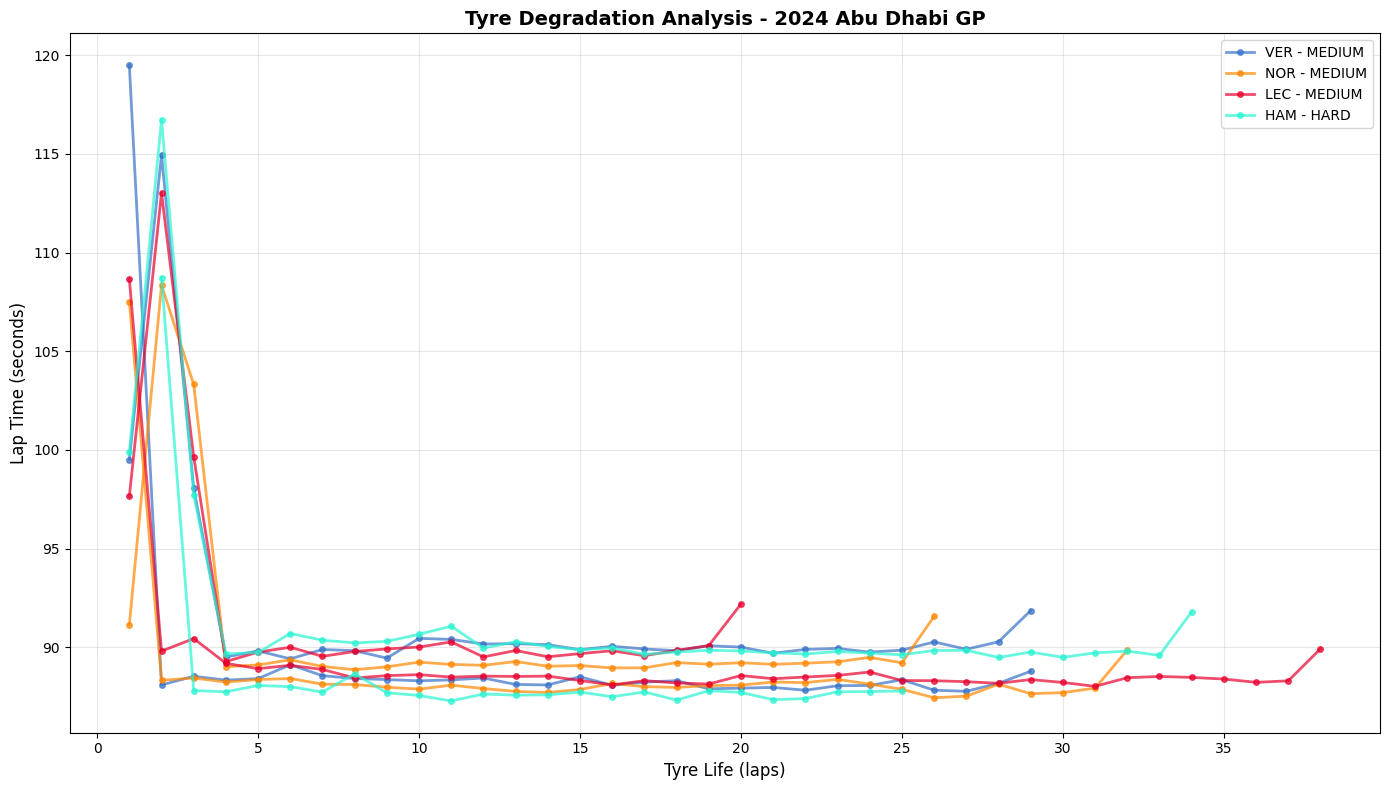

In [18]:
# Visualize tyre degradation - Lap time vs Tyre Life
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for multiple drivers
drivers_to_plot = ['VER', 'NOR', 'LEC', 'HAM']
colors = ['#3671C6', '#FF8700', '#E8002D', '#27F4D2']

for driver, color in zip(drivers_to_plot, colors):
    driver_data = laps_tyre.pick_driver(driver)
    # Filter out in/out laps and invalid times
    driver_data = driver_data[driver_data['LapTime'].notna()]
    
    for stint in driver_data['Stint'].unique():
        stint_data = driver_data[driver_data['Stint'] == stint]
        compound = stint_data['Compound'].iloc[0]
        
        # Convert lap times to seconds for plotting
        lap_times_sec = stint_data['LapTime'].dt.total_seconds()
        
        label = f"{driver} - {compound}" if stint == 1 else f"{compound}"
        ax.plot(stint_data['TyreLife'], lap_times_sec, 
                marker='o', linewidth=2, markersize=4,
                color=color, alpha=0.7, label=label if stint == 1 else '')

ax.set_xlabel('Tyre Life (laps)', fontsize=12)
ax.set_ylabel('Lap Time (seconds)', fontsize=12)
ax.set_title('Tyre Degradation Analysis - 2024 Abu Dhabi GP', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Tyre-Related MCP Tools to Add

Based on this exploration, we should add these MCP server tools:

1. **get_tyre_strategy(year, race, session, driver?)** - Get tyre compound usage and stint info
2. **get_tyre_degradation(year, race, session, driver)** - Analyze lap time degradation vs tyre life
3. **compare_tyre_compounds(year, race, session)** - Compare performance across different compounds
4. **get_pit_stop_summary(year, race, session, driver?)** - Get pit stop timing and duration
5. **get_stint_analysis(year, race, session, driver)** - Detailed stint-by-stint breakdown

These tools will help analyze:
- Race strategy decisions
- Optimal pit stop windows
- Tyre performance and degradation
- Team strategy comparisons

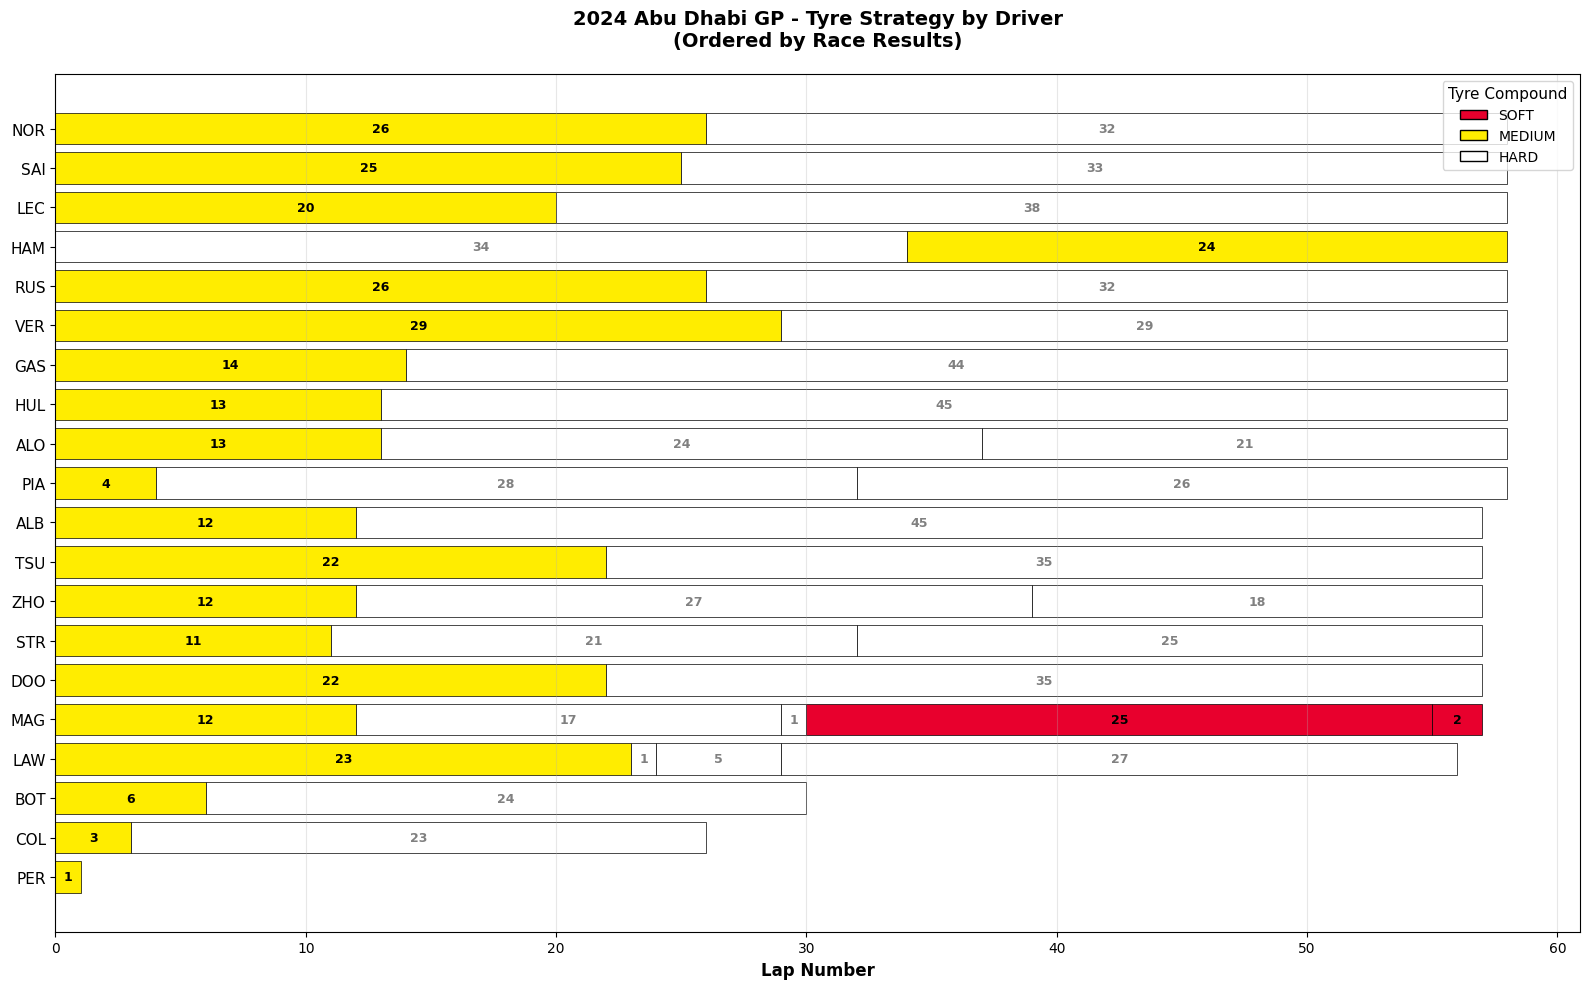

Chart created successfully!

Tyre Strategy Summary:
🔴 SOFT (Red) - C3 compound (softest)
🟡 MEDIUM (Yellow) - C2 compound
⚪ HARD (White) - C1 compound (hardest)
🟢 INTERMEDIATE (Green) - Wet weather, medium grip
🔵 WET (Blue) - Full wet weather conditions


In [19]:
# Create a stacked bar chart showing tyre strategy by driver

fig, ax = plt.subplots(figsize=(16, 10))

# Get race results to order drivers
results = session_tyre.results.sort_values('Points', ascending=False)
driver_order = results['Abbreviation'].tolist()

# Filter to only drivers who finished
finished_drivers = [d for d in driver_order if d in laps_tyre['Driver'].unique()]

# Define tyre colors
tyre_colors = {
    'SOFT': '#E8002D',      # Red
    'MEDIUM': '#FFED00',    # Yellow
    'HARD': '#FFFFFF',      # White
    'INTERMEDIATE': '#00AA00',  # Green
    'WET': '#0080FF'        # Blue
}

# Process data for each driver
driver_data = []
for driver in finished_drivers:
    driver_laps = laps_tyre.pick_driver(driver).sort_values('LapNumber')
    
    stint_info = []
    for stint in driver_laps['Stint'].unique():
        stint_laps = driver_laps[driver_laps['Stint'] == stint]
        compound = stint_laps['Compound'].iloc[0]
        start_lap = stint_laps['LapNumber'].min()
        end_lap = stint_laps['LapNumber'].max()
        laps_count = int(end_lap - start_lap + 1)
        
        stint_info.append({
            'start_lap': start_lap,
            'laps_count': laps_count,
            'compound': compound,
            'color': tyre_colors.get(compound, '#808080')
        })
    
    driver_data.append({
        'driver': driver,
        'stints': stint_info
    })

# Plot bars
y_pos = np.arange(len(driver_data))
for idx, data in enumerate(driver_data):
    left_pos = 0
    for stint in data['stints']:
        ax.barh(idx, stint['laps_count'], left=left_pos, 
                color=stint['color'], edgecolor='black', linewidth=0.5,
                label=stint['compound'] if stint['compound'] not in [s['compound'] for s in data['stints'][:data['stints'].index(stint)]] else '')
        
        # Add lap count text in the middle of each stint bar
        ax.text(left_pos + stint['laps_count']/2, idx, 
               f"{stint['laps_count']}", 
               va='center', ha='center', fontsize=9, fontweight='bold',
               color='black' if stint['compound'] != 'HARD' else 'gray')
        
        left_pos += stint['laps_count']

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels([d['driver'] for d in driver_data], fontsize=11)
ax.set_xlabel('Lap Number', fontsize=12, fontweight='bold')
ax.set_title('2024 Abu Dhabi GP - Tyre Strategy by Driver\n(Ordered by Race Results)', 
            fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=tyre_colors[compound], edgecolor='black', label=compound)
                   for compound in ['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET']
                   if compound in laps_tyre['Compound'].unique()]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10, title='Tyre Compound', title_fontsize=11)

plt.tight_layout()
plt.show()

print("Chart created successfully!")
print(f"\nTyre Strategy Summary:")
print("🔴 SOFT (Red) - C3 compound (softest)")
print("🟡 MEDIUM (Yellow) - C2 compound")
print("⚪ HARD (White) - C1 compound (hardest)")
print("🟢 INTERMEDIATE (Green) - Wet weather, medium grip")
print("🔵 WET (Blue) - Full wet weather conditions")

In [ ]:
# Create an enhanced stacked bar chart showing tyre strategy by driver with improved styling

fig, ax = plt.subplots(figsize=(18, 12))

# Set background color
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('white')

# Get race results to order drivers
results = session_tyre.results.sort_values('Points', ascending=False)
driver_order = results['Abbreviation'].tolist()

# Filter to only drivers who finished
finished_drivers = [d for d in driver_order if d in laps_tyre['Driver'].unique()]

# Define tyre colors
tyre_colors = {
    'SOFT': '#E8002D',      # Red
    'MEDIUM': '#FFED00',    # Yellow
    'HARD': '#FFFFFF',      # White
    'INTERMEDIATE': '#00AA00',  # Green
    'WET': '#0080FF'        # Blue
}

# Get unique compounds used in the race
compounds_used = laps_tyre['Compound'].unique()

# Process data for each driver
driver_data = []
for driver in finished_drivers:
    driver_laps = laps_tyre.pick_driver(driver).sort_values('LapNumber')
    
    stint_info = []
    for stint in sorted(driver_laps['Stint'].unique()):
        stint_laps = driver_laps[driver_laps['Stint'] == stint]
        compound = stint_laps['Compound'].iloc[0]
        start_lap = stint_laps['LapNumber'].min()
        end_lap = stint_laps['LapNumber'].max()
        laps_count = int(end_lap - start_lap + 1)
        
        stint_info.append({
            'start_lap': start_lap,
            'laps_count': laps_count,
            'compound': compound,
            'color': tyre_colors.get(compound, '#808080')
        })
    
    driver_data.append({
        'driver': driver,
        'stints': stint_info
    })

# Plot bars
y_pos = np.arange(len(driver_data))
for idx, data in enumerate(driver_data):
    left_pos = 0
    for stint in data['stints']:
        # Draw bar with black edge
        ax.barh(idx, stint['laps_count'], left=left_pos, 
                color=stint['color'], edgecolor='black', linewidth=1.5,
                height=0.7)
        
        # Add lap count text in the middle of each stint bar
        text_color = 'black' if stint['compound'] not in ['SOFT', 'INTERMEDIATE', 'WET'] else 'white'
        ax.text(left_pos + stint['laps_count']/2, idx, 
               f"{stint['laps_count']}", 
               va='center', ha='center', fontsize=10, fontweight='bold',
               color=text_color)
        
        left_pos += stint['laps_count']
    
    # Add total laps at the end of the bar
    ax.text(left_pos + 2, idx, f"({int(left_pos)})", 
           va='center', ha='left', fontsize=9, fontweight='bold', color='#333333')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels([d['driver'] for d in driver_data], fontsize=12, fontweight='bold')
ax.set_xlabel('Lap Number', fontsize=13, fontweight='bold')
ax.set_title('2024 Abu Dhabi GP - Tyre Strategy by Driver\n(Ordered by Race Results)', 
            fontsize=15, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.4, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Set x-axis limits with padding
max_laps = max(sum(s['laps_count'] for s in d['stints']) for d in driver_data)
ax.set_xlim(0, max_laps + 5)

# Create custom legend with compound information
legend_labels = []
for compound in ['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET']:
    if compound in compounds_used:
        legend_labels.append(compound)

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=tyre_colors[compound], 
                                  edgecolor='black', linewidth=1.5, label=compound)
                   for compound in legend_labels]

ax.legend(handles=legend_elements, loc='upper right', fontsize=11, 
         title='Tyre Compound', title_fontsize=12, framealpha=0.95,
         edgecolor='black', fancybox=True)

# Adjust layout
plt.tight_layout()
plt.show()

print("Enhanced tyre strategy chart created successfully!")
print(f"\nChart Details:")
print(f"Total drivers shown: {len(finished_drivers)}")
print(f"Tyre compounds used: {', '.join(sorted(compounds_used))}")
print(f"\nColor Legend:")
print("🔴 SOFT (Red) - Softest compound")
print("🟡 MEDIUM (Yellow) - Medium compound")
print("⚪ HARD (White) - Hardest compound")
print("🟢 INTERMEDIATE (Green) - Wet weather, medium grip")
print("🔵 WET (Blue) - Full wet weather conditions")

## 16. Test MCP Tyre Strategy Tool

Now that we've added the tyre strategy visualization to our MCP server, let's test it!

In [ ]:
# The MCP tool is now ready! 
# To use it with Claude Desktop or other MCP clients, the tool signature is:
#
# visualize_tyre_strategy(year: int, race: str, session: str = "R")
#
# Example usage through MCP:
#   - year: 2024
#   - race: "Abu Dhabi" 
#   - session: "R" (Race)
#
# The tool will:
# 1. Load the race session data
# 2. Analyze tyre strategy for all drivers
# 3. Create a horizontal stacked bar chart
# 4. Save to f1_visualizations/ directory
# 5. Return detailed statistics

print("✅ MCP Tool Added: visualize_tyre_strategy")
print("\nTool Location: mcp_f1/server/tools/analysis.py")
print("\nFeatures:")
print("  🔹 Horizontal stacked bar chart by driver")
print("  🔹 Color-coded by tyre compound")
print("  🔹 Shows stint lengths and total laps")
print("  🔹 Ordered by race results (points)")
print("  🔹 Auto-saves to f1_visualizations/")
print("\nTo use with Claude Desktop:")
print("  1. Make sure MCP server is configured in claude_desktop_config.json")
print("  2. Ask: 'Show me tyre strategy for 2024 Abu Dhabi race'")
print("  3. Claude will call visualize_tyre_strategy and display results")